In [83]:
# Ref https://www.analyticsvidhya.com/blog/2024/03/getting-started-with-gnn-implementation/

# GNN 은 하드코딩, 나머지는 라이브러리 사용했음. 
# GCN 하드코딩을 좀 확인해봐야함

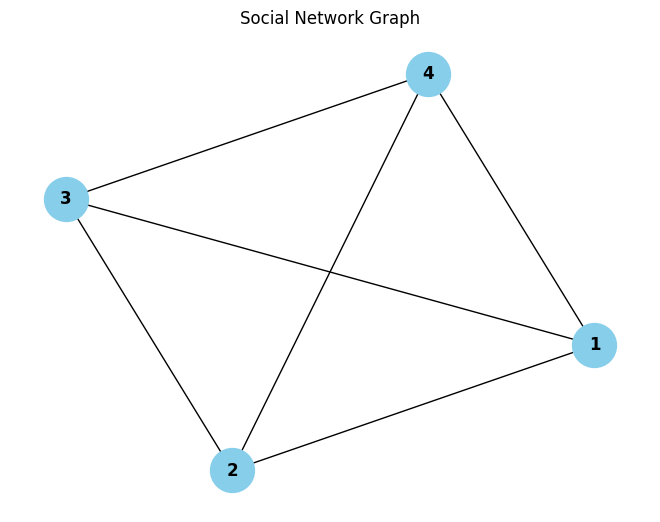

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
social_network = nx.Graph()

# Add nodes representing users
users = [1, 2, 3, 4]
social_network.add_nodes_from(users)

# Add edges representing friendships
friendships = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
social_network.add_edges_from(friendships)

# Visualize the social network graph
pos = nx.spring_layout(social_network)  # Positions for all nodes
nx.draw(social_network, pos, with_labels=True, node_color='skyblue', node_size=1000,
font_size=12, font_weight='bold')
plt.title("Social Network Graph")
plt.show()

In [4]:
# Calculate node degrees
node_degrees = dict(social_network.degree())
print("Node Degrees:", node_degrees)

Node Degrees: {1: 3, 2: 3, 3: 3, 4: 3}


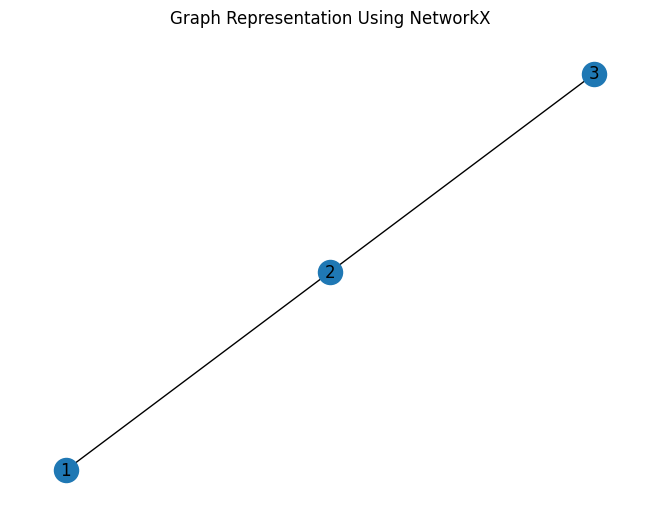

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(2, 3)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.title("Graph Representation Using NetworkX")
plt.show()

/home/eric/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


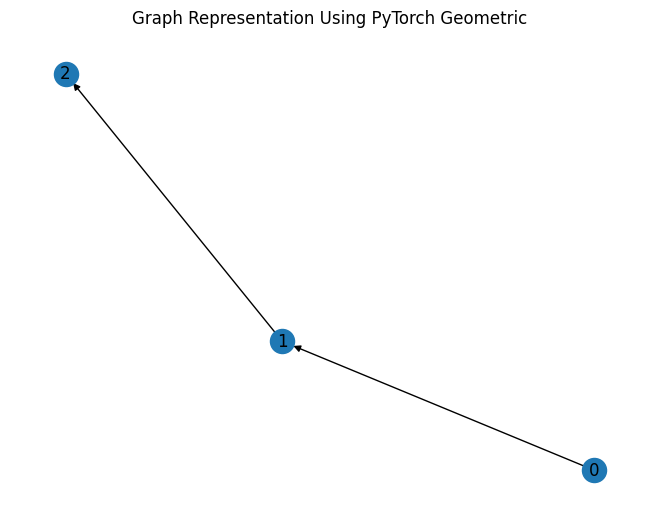

In [14]:
# import libraries
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Define edge indices and node features
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)
x = torch.tensor([[1], [2], [3]], dtype=torch.float)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index.t().contiguous())

# Convert to NetworkX graph
G = to_networkx(data)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.title("Graph Representation Using PyTorch Geometric")
plt.show()

In [77]:
import numpy as np

# Define a toy graph with 4 nodes and their initial features
num_nodes = 4
num_features = 2
adjacency_matrix = np.array([[0, 1, 0, 1],
                             [1, 0, 1, 1],
                             [0, 1, 0, 0],
                             [1, 1, 0, 0]])  # Adjacency matrix

node_features = np.random.rand(num_nodes, num_features)  # Random node features

print("Before updating node features:")
print(node_features)
# Define a simple message passing function
def message_passing(adj_matrix, node_feats):
    updated_feats = np.zeros_like(node_feats)
    num_nodes = len(node_feats)
    
    # Iterate over each node
    for i in range(num_nodes):
        # Gather neighboring nodes based on adjacency matrix
        neighbors = np.where(adj_matrix[i] == 1)[0]
        print("neightbors", neighbors)
        
        # Aggregate messages from neighbors
        print("neightbors shape:", neighbors.shape)
        
        # array 끼리여서, array[array] 구조로 indexing 가능. 
        message = np.sum(node_feats[neighbors], axis=0) 
        print("sumed", node_feats[neighbors])
        
        # Update node representation
        updated_feats[i] = node_feats[i] + message
    
    return updated_feats

# Perform message passing for one iteration
updated_features = message_passing(adjacency_matrix, node_features)
print("Updated Node Features after Message Passing:")
print(updated_features)

# output
#Updated Node Features after Message Passing:
#[[0.5602586  1.54137027]
# [0.61232074 1.59538215]
# [0.28878133 0.69739586]
#[0.5602586  1.54137027]]

Before updating node features:
[[0.81233396 0.2026659 ]
 [0.47211357 0.08516832]
 [0.31775998 0.81599906]
 [0.70998039 0.60522774]]
neightbors [1 3]
neightbors shape: (2,)
sumed [[0.47211357 0.08516832]
 [0.70998039 0.60522774]]
neightbors [0 2 3]
neightbors shape: (3,)
sumed [[0.81233396 0.2026659 ]
 [0.31775998 0.81599906]
 [0.70998039 0.60522774]]
neightbors [1]
neightbors shape: (1,)
sumed [[0.47211357 0.08516832]]
neightbors [0 1]
neightbors shape: (2,)
sumed [[0.81233396 0.2026659 ]
 [0.47211357 0.08516832]]
Updated Node Features after Message Passing:
[[1.99442792 0.89306196]
 [2.3121879  1.70906101]
 [0.78987355 0.90116737]
 [1.99442792 0.89306196]]


In [82]:
# Define the number of message passing iterations
num_iterations = 3

# Perform multiple iterations of message passing
for _ in range(num_iterations):
    updated_node_features = message_passing(adjacency_matrix, node_features)
    node_features = updated_node_features

print("Updated Node Features after Multiple Iterations of Message Passing:")
print(node_features)

neightbors [1 3]
neightbors shape: (2,)
sumed [[739658.96525505 443762.12818957]
 [632143.1637172  379249.95891051]]
neightbors [0 2 3]
neightbors shape: (3,)
sumed [[632143.1637172  379249.95891051]
 [340839.8079787  204497.54304952]
 [632143.1637172  379249.95891051]]
neightbors [1]
neightbors shape: (1,)
sumed [[739658.96525505 443762.12818957]]
neightbors [0 1]
neightbors shape: (2,)
sumed [[632143.1637172  379249.95891051]
 [739658.96525505 443762.12818957]]
neightbors [1 3]
neightbors shape: (2,)
sumed [[2344785.10066815 1406759.58906011]
 [2003945.29268945 1202262.04601059]]
neightbors [0 2 3]
neightbors shape: (3,)
sumed [[2003945.29268945 1202262.04601059]
 [1080498.77323375  648259.67123909]
 [2003945.29268945 1202262.04601059]]
neightbors [1]
neightbors shape: (1,)
sumed [[2344785.10066815 1406759.58906011]]
neightbors [0 1]
neightbors shape: (2,)
sumed [[2003945.29268945 1202262.04601059]
 [2344785.10066815 1406759.58906011]]
neightbors [1 3]
neightbors shape: (2,)
sumed [[